# Figure 1

Import pandas and matplotlib librairies

In [18]:
import pandas as pd                     # Data 
import matplotlib.pyplot as plt         # Plot
import matplotlib.dates as mdates       # Plot
import datetime as dt                   # Plot
import matplotlib.transforms as mtrans  # Plot

Use Latex Font

In [19]:
plt.rcParams.update({"text.usetex": True,
                     "font.family": "serif",
                     "font.serif": ["Computer Modern"],
                     "font.size": 11,
                     "axes.labelsize": 11,
                     "legend.fontsize": 11,
                     "xtick.labelsize": 9,
                     "ytick.labelsize": 9})  

## Data & Methods

Read CF data

In [20]:
cf_wind = pd.read_csv('../Data/cf_wind_2014-2023.csv',
                      index_col = 0,
                      parse_dates = True)

Set starting and ending dates

In [21]:
start_date = '2021-07-07'
end_date = '2021-07-15'

In [22]:
cf_wind = cf_wind[(start_date <= cf_wind.index) & (cf_wind.index < end_date)]

Create moving average

In [23]:
cf_wind_roll = cf_wind.rolling(window = '24h', center = True).mean()

## Plot

In [24]:
myFmt = mdates.DateFormatter('%d')
cm = 1 / 2.54

col = '#2ca02c'         # Green
col_roll = '#e377c2'    # Pink

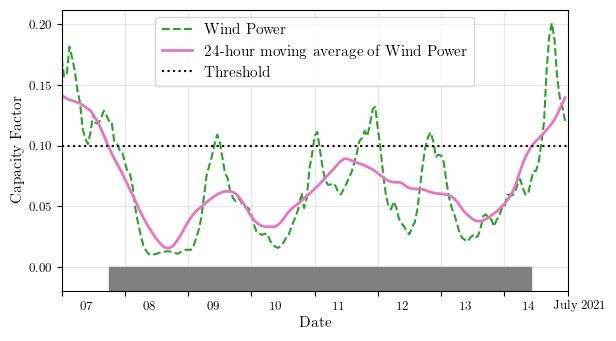

In [25]:
fig, ax = plt.subplots(1, 1,
                       figsize = (16*cm, 9*cm))

# Wind data
ax.plot(cf_wind.index, cf_wind['OBS'], 
        ls = '--', 
        lw = 1.5, 
        color = col, 
        label = 'Wind Power', 
        zorder = 2)
# Rolling wind data
ax.plot(cf_wind_roll.index, cf_wind_roll['OBS'],
        ls = '-',
        lw = 2, 
        color = col_roll, 
        label = '24-hour moving average of Wind Power ', 
        zorder = 2)

# Threshold
ax.axhline(0.1,
           ls = ':',
           lw = 1.5,
           color = 'black',
           label = 'Threshold')
# Wind drought
ax.fill_between(cf_wind_roll.index, 0, -0.02,
                where = cf_wind_roll['OBS'] < 0.1, 
                color = 'grey', 
                zorder = 2)

ax.set_xlabel('Date')
ax.set_xlim(dt.datetime.strptime(start_date, '%Y-%m-%d'),
            dt.datetime.strptime(end_date, '%Y-%m-%d'))
ax.xaxis.set_major_formatter(myFmt)
# This is the correct value even if it does not look like it on the plot
trans = mtrans.Affine2D().translate(25, 0) 
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
# Remove the last x-tick label
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
xticklabels[-1].set_visible(False)  # Hide the last label
ax.text(0.97, -0.066, 'July 2021', transform=ax.transAxes, fontsize = 9)


ax.set_ylabel('Capacity Factor')
ax.set_ylim(-0.02)

ax.grid(True, alpha = 0.3, zorder = 0)

ax.legend(loc = 'upper center')

fig.tight_layout()
fig.savefig('1_methodology_identification.pdf', bbox_inches = 'tight')